# Pca

In [ ]:
import pandas as pd
df=pd.read_csv("../../Data/diamonds.csv")
# preprocessing te data
print(df.info())
df_ohe=pd.get_dummies(df)
df_ohe=df_ohe.iloc[:,1:]
df_ohe.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None


(53940, 27)

In [ ]:
# standardeize the data
from sklearn.preprocessing import StandardScaler
df_ohe_std=StandardScaler().fit_transform(df_ohe)


array([[-1.19816781, -0.17409151, -1.09967199, ..., -0.54229492,
        -0.26960284, -0.32195387],
       [-1.24036129, -1.36073849,  1.58552871, ..., -0.54229492,
        -0.26960284, -0.32195387],
       [-1.19816781, -3.38501862,  3.37566251, ..., -0.54229492,
        -0.26960284, -0.32195387],
       ...,
       [-0.20662095,  0.73334442,  1.13799526, ..., -0.54229492,
        -0.26960284, -0.32195387],
       [ 0.13092691, -0.52310533,  0.24292836, ..., -0.54229492,
        -0.26960284, -0.32195387],
       [-0.10113725,  0.31452784, -1.09967199, ..., -0.54229492,
        -0.26960284, -0.32195387]])

Apply Pca

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(random_state=7)
pca.fit(df_ohe_std)
trans_data=pca.transform(df_ohe)
print(type(trans_data))
df_trans=pd.DataFrame(trans_data,index=df_ohe.index)
df_trans.head()



<class 'numpy.ndarray'>


/Users/namanjain/Documents/Machine learning/myenv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,139.368885,25.144501,-5.420825,6.682284,11.306783,20.504862,-9.620213,8.350224,6.737622,1.916390,...,-84.608153,56.536472,72.196255,238.389263,17.860011,-120.431990,56.207788,0.352098,0.555683,0.501306
1,140.048783,20.471983,-6.505641,6.800546,11.702241,19.689144,-10.296138,9.076158,6.523036,2.014340,...,-85.976243,54.466130,75.138316,238.431873,17.726374,-120.466613,56.138576,0.349795,0.487481,0.553152
2,140.969725,18.279721,-8.095190,7.411139,12.166854,20.267034,-10.089289,9.143613,6.279738,1.072718,...,-87.315191,51.731896,76.435774,239.017348,17.672469,-120.910677,56.233641,0.365415,0.319490,0.461676
3,143.391140,23.975397,-6.344032,7.044469,11.241817,20.909869,-10.856678,9.923078,7.005992,2.345946,...,-87.054717,57.655352,74.340305,244.034824,18.262555,-123.421220,57.585848,0.258662,0.484718,0.533968
4,144.068613,24.511410,-5.149434,7.449390,11.592691,20.859298,-10.158744,9.312658,7.421973,1.697815,...,-87.084552,57.782848,74.677709,244.829860,18.373365,-123.854263,57.870899,0.186283,0.310647,0.463584


In [14]:
pca.components_[0]

array([ 0.43316486,  0.00368549,  0.12153405,  0.39250302,  0.43390141,
        0.42719612,  0.42679143,  0.05118021,  0.02706468, -0.11834286,
        0.08221848,  0.01344722, -0.0502738 , -0.06822746, -0.02562698,
       -0.01864352,  0.0523511 ,  0.07587711,  0.08381851,  0.05225796,
       -0.06313514,  0.03967757,  0.13756   , -0.02852057, -0.01941727,
       -0.0926597 , -0.0748959 ])

In [ ]:
# getting how much percentage of data is explained by a component
pca.explained_variance_ratio_*100

array([1.89766900e+01, 7.29817807e+00, 5.72116590e+00, 5.01369290e+00,
       4.85897355e+00, 4.81032974e+00, 4.56739263e+00, 4.50643929e+00,
       4.41474715e+00, 4.38475439e+00, 4.26784240e+00, 4.11434079e+00,
       4.08997234e+00, 3.94138898e+00, 3.83990348e+00, 3.69317821e+00,
       3.51941693e+00, 3.03686560e+00, 2.89767501e+00, 1.30488424e+00,
       4.60856511e-01, 1.48430007e-01, 9.03643763e-02, 4.25174655e-02,
       3.24149917e-13, 3.64428253e-14, 0.00000000e+00])

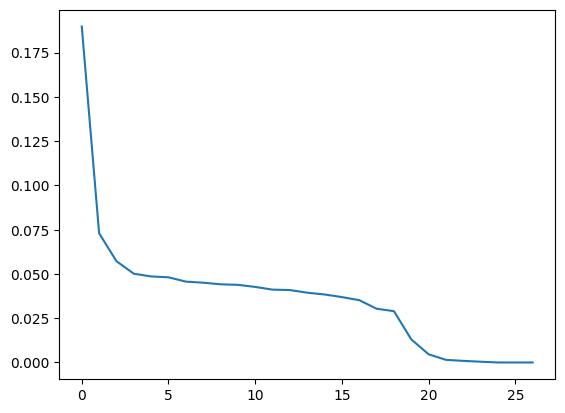

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(range(df_ohe.shape[1])),pca.explained_variance_ratio_)

# From graph we can say that the no of component required is somewhere bw 18 to 20

The automate way to do this is

In [ ]:
pca1=PCA(n_components=0.95,random_state=7)
pca1.fit(df_ohe_std)
pca1_transform=pca1.transform(df_ohe_std)
pca1_transform.shape


# THe output you can see is stating that for getting 95 percent of explain variable you have to select this 18 columns

(53940, 18)

In [ ]:
# TO see what are those component who is stating the 95 percent of the model 
#???
